Importing all neccesary libraries

In [3]:
# Importing all relavent libraries for project
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

Reading the dataset

In [36]:
try:
    df = pd.read_csv(r"C:\Users\ruthu\OneDrive\Desktop\Projects\Sales_database.csv")
    print(df.tail())
# Checking if the file is empty
except pd.errors.EmptyDataError:
    print("The file is empty. Please check the file content.")
# Checking if the file is not found
except FileNotFoundError:
    print("The file was not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


        Unnamed: 0  Order ID                 Product  Quantity Ordered  \
185945       13617    222905  AAA Batteries (4-pack)                 1   
185946       13618    222906        27in FHD Monitor                 1   
185947       13619    222907    USB-C Charging Cable                 1   
185948       13620    222908    USB-C Charging Cable                 1   
185949       13621    222909  AAA Batteries (4-pack)                 1   

        Price Each       Order Date                       Purchase Address  \
185945        2.99   7/6/2019 19:02          795 Pine St, Boston, MA 02215   
185946      149.99   1/6/2019 19:29  495 North St, New York City, NY 10001   
185947       11.95  22/6/2019 18:57  319 Ridge St, San Francisco, CA 94016   
185948       11.95  26/6/2019 18:35   916 Main St, San Francisco, CA 94016   
185949        2.99  25/6/2019 14:33         209 11th St, Atlanta, GA 30301   

        Month   Sales            City  Hour  
185945      6    2.99          Boston   

Getting the information of the dataset

In [40]:
df.columns
## The name of the columns present in the dataset

Index(['Unnamed: 0', 'Order ID', 'Product', 'Quantity Ordered', 'Price Each',
       'Order Date', 'Purchase Address', 'Month', 'Sales', 'City', 'Hour'],
      dtype='object')

In [46]:
df.shape
## The size of dataset in the form of (row,column)

(185950, 11)

In [48]:
df.info()
## This pulls out the column, count and the data type of the values present under each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185950 entries, 0 to 185949
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        185950 non-null  int64  
 1   Order ID          185950 non-null  int64  
 2   Product           185950 non-null  object 
 3   Quantity Ordered  185950 non-null  int64  
 4   Price Each        185950 non-null  float64
 5   Order Date        185950 non-null  object 
 6   Purchase Address  185950 non-null  object 
 7   Month             185950 non-null  int64  
 8   Sales             185950 non-null  float64
 9   City              185950 non-null  object 
 10  Hour              185950 non-null  int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 15.6+ MB


In [50]:
df.describe

<bound method NDFrame.describe of         Unnamed: 0  Order ID                 Product  Quantity Ordered  \
0                0    295665      Macbook Pro Laptop                 1   
1                1    295666      LG Washing Machine                 1   
2                2    295667    USB-C Charging Cable                 1   
3                3    295668        27in FHD Monitor                 1   
4                4    295669    USB-C Charging Cable                 1   
...            ...       ...                     ...               ...   
185945       13617    222905  AAA Batteries (4-pack)                 1   
185946       13618    222906        27in FHD Monitor                 1   
185947       13619    222907    USB-C Charging Cable                 1   
185948       13620    222908    USB-C Charging Cable                 1   
185949       13621    222909  AAA Batteries (4-pack)                 1   

        Price Each        Order Date                        Purchase Address 

In [52]:
df.isnull().sum()

Unnamed: 0          0
Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Month               0
Sales               0
City                0
Hour                0
dtype: int64

Removing the Index Row

In [54]:
if 'Unnamed: 0' in df.columns:
    df = df.drop(columns=['Unnamed: 0'])

Removing Any And All Duplicate Rows

In [58]:
df = df.drop_duplicates()

What is the .apply()?
- The 'apply' method is a powerful function in programming, particularly in data manipulation libraries like pandas, which allows users to apply a  function along an axis of a DataFrame or on values of a Series. It enables complex data transformations and aggregations by applying custom or built-in functions to datasets, enhancing data processing capabilities.

In [60]:
# Let's use .apply()
# This two functions are used to get the city from the dataset 
def get_city(address):
    return address.split(',')[1]

df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}")
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour
0,295665,Macbook Pro Laptop,1,1700.00,30/12/2019 0:01,"136 Church St, New York City, NY 10001",12,1700.00,New York City,0
1,295666,LG Washing Machine,1,600.00,29/12/2019 7:03,"562 2nd St, New York City, NY 10001",12,600.00,New York City,7
2,295667,USB-C Charging Cable,1,11.95,12/12/2019 18:21,"277 Main St, New York City, NY 10001",12,11.95,New York City,18
3,295668,27in FHD Monitor,1,149.99,22/12/2019 15:13,"410 6th St, San Francisco, CA 94016",12,149.99,San Francisco,15
4,295669,USB-C Charging Cable,1,11.95,18/12/2019 12:38,"43 Hill St, Atlanta, GA 30301",12,11.95,Atlanta,12


Question 1: What was the best month for sales? How much was earned that month?

The best way to approach this is to find the sum of the sales in one month and compare it to the other months. For easier understandind, a graph can be ploted to understand the sales sold.

In [68]:
bestsales = df.groupby("Month").sum().sort_values(by='Sales', ascending=True)
bestsales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Sales,City,Hour
Month,,,,,,,,,
1,1420152202,Lightning Charging CableiPhoneLightning Chargi...,10893,1810924.81,1/1/2020 0:381/1/2020 0:221/1/2020 0:221/1/202...,"427 Wilson St, Dallas, TX 75001519 13th St, Ne...",1821413.16,Dallas New York City New York City San Franci...,139339
9,2944144303,Apple Airpods Headphones34in Ultrawide Monitor...,13091,2081897.65,1/9/2019 4:131/9/2019 1:091/9/2019 2:071/9/201...,"761 Forest St, San Francisco, CA 94016373 1st ...",2094465.69,San Francisco San Francisco Seattle San Franc...,168206
2,1868278508,iPhoneAA Batteries (4-pack)27in 4K Gaming Moni...,13431,2186940.38,18/2/2019 1:3513/2/2019 7:2418/2/2019 9:462/2/...,"866 Spruce St, Portland, ME 0410118 13th St, S...",2200078.08,Portland San Francisco New York City Atlanta ...,172392
8,2894980432,Wired HeadphonesBose SoundSport HeadphonesiPho...,13429,2226963.90,31/8/2019 22:2115/8/2019 15:116/8/2019 14:4029...,"359 Spruce St, Seattle, WA 98101492 Ridge St, ...",2241083.37,Seattle Dallas Portland Los Angeles New York ...,172049
6,2928868159,27in FHD MonitorAAA Batteries (4-pack)Lightnin...,15234,2560503.50,1/6/2019 3:261/6/2019 1:061/6/2019 0:181/6/201...,"856 Elm St, San Francisco, CA 94016877 Center ...",2576280.15,San Francisco Dallas San Francisco San Franci...,195223
7,3280010744,Apple Airpods HeadphonesFlatscreen TVAA Batter...,16054,2631225.12,26/7/2019 16:515/7/2019 8:5529/7/2019 12:4128/...,"389 South St, Atlanta, GA 30301590 4th St, Sea...",2646461.32,Atlanta Seattle Atlanta Atlanta Seattle San F...,205909
3,2560592045,AAA Batteries (4-pack)AAA Batteries (4-pack)Wi...,16979,2789084.64,1/3/2019 3:061/3/2019 1:031/3/2019 2:181/3/201...,"270 Dogwood St, San Francisco, CA 94016683 Ada...",2804973.35,San Francisco Portland San Francisco San Fran...,218622
5,3343056791,Apple Airpods Headphones27in FHD MonitoriPhone...,18653,3133134.61,1/5/2019 3:291/5/2019 0:131/5/2019 0:481/5/201...,"589 Lake St, Portland, OR 97035615 Lincoln St,...",3150616.23,Portland San Francisco Boston Boston San Fran...,238580
11,5038923457,Wired HeadphonesUSB-C Charging CableApple Airp...,19769,3178872.53,21/11/2019 9:5417/11/2019 10:0319/11/2019 14:5...,"46 Park St, New York City, NY 10001962 Hickory...",3197875.05,New York City Austin Los Angeles Seattle Bost...,254430


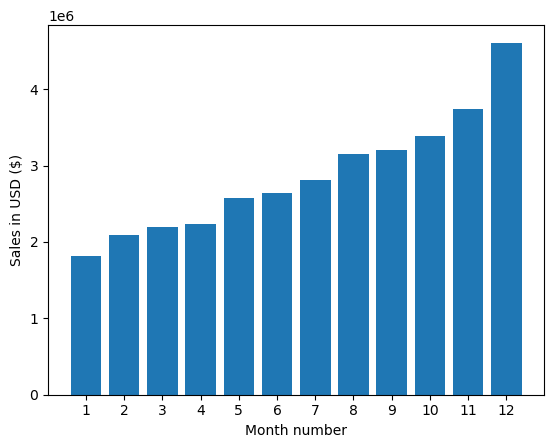

In [72]:
## Ploting a graph giving it a range, we add one more month "13" as this will cause a out of range error.
months=range(1,13)

plt.bar(months,bestsales['Sales'])
plt.xticks(months)
plt.xlabel("Month number")
plt.ylabel("Sales in USD ($)")
plt.show()

In [111]:
monthly_sales = df.groupby('Month')['Sales'].sum()
highest_sales_month = monthly_sales.idxmax()
highest_sales_value = monthly_sales.max()

print("The month with the hightest sales is",highest_sales_month,"with sales of",highest_sales_value,"USD")

The month with the hightest sales is 12 with sales of 4608295.7 USD


What city had the best sales?

In [125]:
## Here we group the dataset by the city and find the sum of sales in each city
## The nlargest() is a function that call the  largest n numbers to store in city_sales
city_sales = df.groupby("City")['Sales'].sum().nlargest(10)
city_sales

City
San Francisco    8254743.55
Los Angeles      5448304.28
New York City    4661867.14
Boston           3658627.65
Atlanta          2794199.07
Dallas           2765373.96
Seattle          2745046.02
Portland         2319331.94
Austin           1818044.33
Name: Sales, dtype: float64

In [135]:
## repeating the above statement to print the city with highest sales 
highest_city_sales = df.groupby("City")['Sales'].sum().nlargest(1)
highest_city_sales

City
San Francisco    8254743.55
Name: Sales, dtype: float64

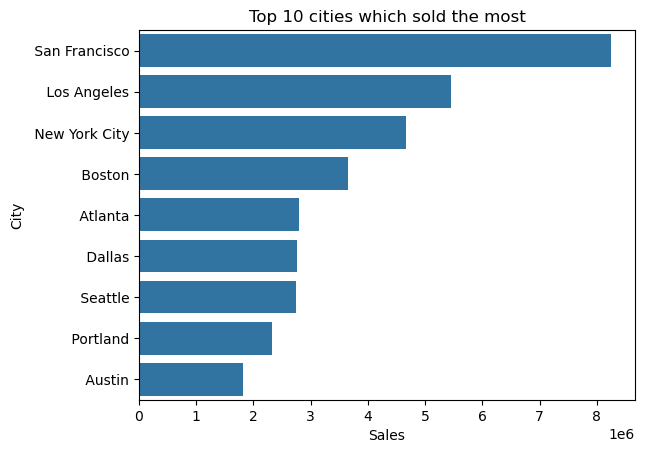

In [137]:
sns.barplot(y=city_sales.index,x=city_sales).set(title='Top 10 cities which sold the most' );

Question 5:What product sold the most? Why do you think it sold the most?


In [140]:
product_group = df.groupby('Product')

In [142]:
quantity_ordered =product_group.sum()['Quantity Ordered']

products = [product for product ,df in product_group]

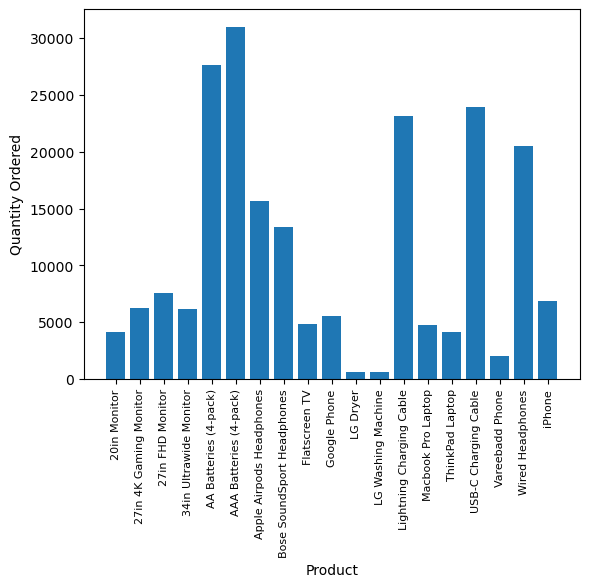

In [143]:
plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products,rotation='vertical',size=8)
plt.show()

Trend in Hours vs sales

<Axes: xlabel='Hour'>

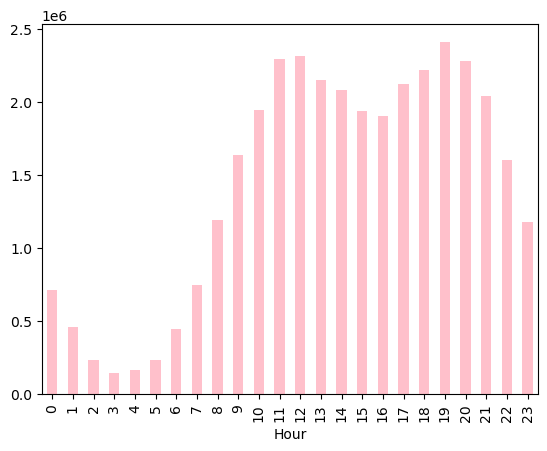

In [156]:
df.groupby('Hour')['Sales'].sum().plot.bar(color='pink')

This is the end of the data Analysis sheet, hoped it helped out!!!